# Chequeamos cómo funcionó ASIF

In [1]:
import numpy as np
import json

In [20]:
def get_accuracy_top1(i, j, p=1, k=4221):
    asif_value = 0
    with open(f'retrieval/retrieval_w2v_{i}_bert_{j}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    total = len(retrieval['words_retrieval'])
    words = []
    count_top1 = 0
    for i in range(total):
        word = retrieval['words_retrieval'][i][0]
        if word == retrieval['words_retrieval'][i][1][0]:
            count_top1 += 1
            words.append(word)
    asif_value = count_top1 / total
    return asif_value, words 

  
def get_accuracy_top5(i, j, p=1, k=4221):
    asif_value = 0
    with open(f'retrieval/retrieval_w2v_{i}_bert_{j}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    total = len(retrieval['words_retrieval'])
    words = []
    count_top5 = 0
    for i in range(total):
        word = retrieval['words_retrieval'][i][0]
        if word in retrieval['words_retrieval'][i][1]:
            count_top5 += 1
            words.append(word)
    asif_value = count_top5 / total
    return asif_value, words

## Para los valores del paper de ASIF

In [6]:
with open('retrieval_a_p8_k800.json', 'r') as f:
    retrieval = json.load(f)

In [7]:
retrieval['words_retrieval']

[['some', ['the', 'the', 'the', 'was', 'the', 'was']],
 ['this', ['the', 'the', 'the', 'the', 'the', 'the']],
 ['of', ['of', 'of', 'of', 'of', 'of', 'of']],
 ['fire', ['i', 'i', 'i', 'i', 'i', 'i']],
 ['we', ['he', 'he', 'he', 'he', 'he', 'he']],
 ['never', ['and', 'and', 'and', 'and', 'and', 'and']],
 ['illustration', ['the', 'the', 'the', 'the', 'the', 'the']],
 ['was', ['was', 'was', 'was', 'was', 'was', 'was']],
 ['me', ['he', 'he', 'he', 'he', 'he', 'he']],
 ['excitement', ['and', 'and', 'and', 'and', 'and', 'and']],
 ['probably', ['the', 'the', 'the', 'the', 'the', 'the']],
 ['in', ['in', 'in', 'in', 'in', 'in', 'in']],
 ['cross', ['was', 'was', 'was', 'was', 'was', 'was']],
 ['and', ['and', 'and', 'and', 'and', 'and', 'and']],
 ['garden', ['and', 'and', 'and', 'and', 'and', 'and']],
 ['no', ['and', 'and', 'and', 'and', 'and', 'and']],
 ['pocket', ['of', 'of', 'of', 'of', 'of', 'of']],
 ['voice', ['was', 'was', 'was', 'was', 'was', 'was']],
 ['an', ['and', 'and', 'and', 'and', 'a

In [8]:
count_top1 = 0 
total = len(retrieval['words_retrieval'])
for i in range(total):
    word = retrieval['words_retrieval'][i][0]
    if word == retrieval['words_retrieval'][i][1][0]:
        count_top1 += 1

print(f'words in top 1 {count_top1 / total}')        

words in top 1 0.24733475479744135


In [9]:
count_top5 = 0 
words = []
for i in range(total):
    word = retrieval['words_retrieval'][i][0]
    if word in retrieval['words_retrieval'][i][1]:
        count_top5 += 1
        words.append(word)

print(f'words in top 5 {count_top5 / total}')  

words in top 5 0.25884861407249465


Veamos las palabras que falla para entender un poco el por qué:

In [10]:
import json

with open('../alignments/audio_alignments.json', 'r') as file:
    data_dict = json.load(file)

with open('../words_in_order_audio.json', 'r') as f:
    words = json.load(f)

In [11]:
count_top5 = 0 
for i in range(total):
    word = retrieval['words_retrieval'][i][0]
    if word in retrieval['words_retrieval'][i][1]:
        count_top5 += 1
    else:
        print(retrieval['words_retrieval'][i]) 
        filename = words[retrieval['rows_deleted'][i]][1]
        base = filename[:-5]  # Esto elimina '.json', resultando en '777-126732-0078'
        first_part, second_part, third_part = base.split('-')
        key = f"../datasets/librispeech-raw/dev-clean/{first_part}/{second_part}/{base}"
        print(data_dict[key]['transcript_audio']) 
        print('-----')

['some', ['the', 'the', 'the', 'was', 'the', 'was']]
FOR SOME LITTLE TIME THAT IS IT SEEMED LONG THOUGH I BELIEVE IT WAS NOT MORE THAN A MINUTE BEFORE TWO MEN CAME RUNNING FROM THE MUSICIANS GALLERY
-----
['this', ['the', 'the', 'the', 'the', 'the', 'the']]
THIS BOND IS BETWEEN MAN AND MAN IS USUALLY FORMED IN EARLY YOUTH AND CAN ONLY BE BROKEN BY DEATH
-----
['fire', ['i', 'i', 'i', 'i', 'i', 'i']]
THE TELEPHONE LINE WAS SOON REPAIRED AND A STEADY STREAM OF RESCUE VEHICLES BEGAN ARRIVING FROM HARKNESS FIRE TRUCKS THREE AMBULANCES AND PRIVATE CARS DRIVEN BY VOLUNTEERS
-----
['we', ['he', 'he', 'he', 'he', 'he', 'he']]
BUI WE SHOULD NOT FORGET OUR PROMISE TO OUR FATHER CRIED THE YOUNGEST DAUGHTER
-----
['never', ['and', 'and', 'and', 'and', 'and', 'and']]
MISS WOODLEY OBEDIENTLY SAT DOWN AND THOUGH HER THOUGHTS AND HEART WERE IN THE CHAMBER OF HER FRIEND SHE NEVER MARKED BY ONE IMPERTINENT WORD OR BY ONE LINE OF HER FACE THE RESTRAINT SHE SUFFERED
-----
['illustration', ['the', 'the', '

# Para otros valores

In [12]:
import numpy as np
import json
with open('retrieval_p1_k4221.json', 'r') as f:
    retrieval = json.load(f)

In [14]:
count_top1 = 0 
total = len(retrieval['words_retrieval'])
for i in range(total):
    word = retrieval['words_retrieval'][i][0]
    if word == retrieval['words_retrieval'][i][1][0]:
        count_top1 += 1

print(f'words in top 1 {count_top1 / total}')

words in top 1 0.27505330490405117


In [15]:
count_top5 = 0 
words = []
for i in range(total):
    word = retrieval['words_retrieval'][i][0]
    if word in retrieval['words_retrieval'][i][1]:
        count_top5 += 1
        words.append(word)

print(f'words in top 5 {count_top5 / total}')  

words in top 5 0.3652452025586354


In [16]:
with open('../alignments/audio_alignments.json', 'r') as file:
    data_dict = json.load(file)

with open('../words_in_order_audio.json', 'r') as f:
    words = json.load(f)

In [17]:
count_top5 = 0 
for i in range(total):
    word = retrieval['words_retrieval'][i][0]
    if word in retrieval['words_retrieval'][i][1]:
        count_top5 += 1
    else:
        print(retrieval['words_retrieval'][i]) 
        filename = words[retrieval['rows_deleted'][i]][1]
        base = filename[:-5]  # Esto elimina '.json', resultando en '777-126732-0078'
        first_part, second_part, third_part = base.split('-')
        key = f"../datasets/librispeech-raw/dev-clean/{first_part}/{second_part}/{base}"
        print(data_dict[key]['transcript_audio']) 
        print('-----')

['some', ['scarcely', 'somehow', 'surely', 'curiously', 'nothing', 'exactly']]
FOR SOME LITTLE TIME THAT IS IT SEEMED LONG THOUGH I BELIEVE IT WAS NOT MORE THAN A MINUTE BEFORE TWO MEN CAME RUNNING FROM THE MUSICIANS GALLERY
-----
['fire', ['mode', 'salad', 'oakley', 'mode', 'niece', 'preface']]
THE TELEPHONE LINE WAS SOON REPAIRED AND A STEADY STREAM OF RESCUE VEHICLES BEGAN ARRIVING FROM HARKNESS FIRE TRUCKS THREE AMBULANCES AND PRIVATE CARS DRIVEN BY VOLUNTEERS
-----
['we', ['ye', 'ye', 'you', 'you', 'you', 'you']]
BUI WE SHOULD NOT FORGET OUR PROMISE TO OUR FATHER CRIED THE YOUNGEST DAUGHTER
-----
['illustration', ['deception', 'courage', 'satisfaction', 'curiosity', 'illusions', 'fuss']]
ILLUSTRATION BASIL
-----
['was', ['trusts', 'appeared', 'appeared', 'prefer', 'depended', 'appeared']]
IT SEEMED EVIDENT THAT A MYSTERIOUS AND PROBABLY OCCULT SCIENCE WHICH WAS TO SURGERY WHAT ALCHEMY WAS TO CHEMISTRY HAD CHISELLED HIS FLESH EVIDENTLY AT A VERY TENDER AGE AND MANUFACTURED HIS COUN

## Son CKA y ASIF metricas similares?

In [25]:
# get ASIF top1 for the best path

asif_values_best = []
for i in range(11):
    asif_value, words = get_accuracy_top1(i=i, j=3, p=1, k=4221) 
    asif_values_best.append(asif_value)
asif_value, words = get_accuracy_top1(i=11, j=4, p=1, k=4221)
asif_values_best.append(asif_value)     

In [26]:
# get ASIF top5 for the best path

asif_values_best_5 = []
for i in range(11):
    asif_value, words = get_accuracy_top5(i=i, j=3, p=1, k=4221) 
    asif_values_best_5.append(asif_value)
asif_value, words = get_accuracy_top5(i=11, j=4, p=1, k=4221)
asif_values_best_5.append(asif_value)     

In [27]:
# get ASIF top1 for the identity

asif_values = []
for i in range(12):
    asif_value, words = get_accuracy_top1(i=i, j=i, p=1, k=4221) 
    asif_values.append(asif_value)

In [28]:
# get ASIF top1 for the identity

asif_values_5 = []
for i in range(12):
    asif_value, words = get_accuracy_top5(i=i, j=i, p=1, k=4221) 
    asif_values_5.append(asif_value)

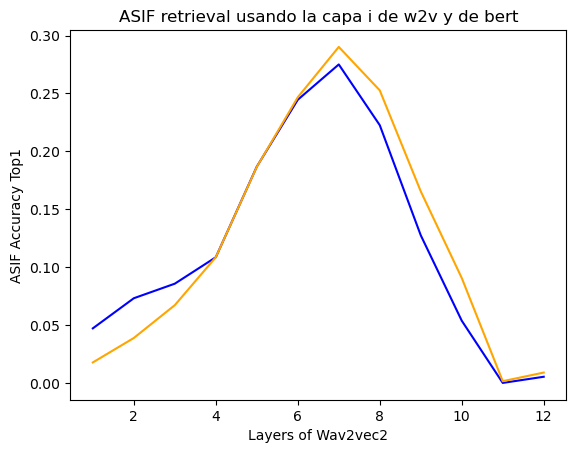

In [32]:

import matplotlib.pyplot as plt

x = range(1,13)
plt.plot(x, asif_values_best, label='wav_vs_glove', color='blue')
plt.plot(x, asif_values, label='wav_vs_glove', color='orange')

plt.xlabel('Layers of Wav2vec2')
plt.ylabel('ASIF Accuracy Top1')
plt.title('ASIF retrieval usando la capa i de w2v y de bert')
plt.show()

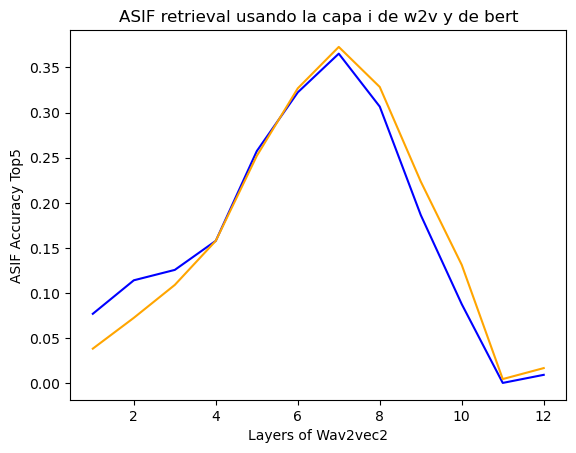

In [33]:

import matplotlib.pyplot as plt

x = range(1,13)
plt.plot(x, asif_values_best_5, label='wav_vs_glove', color='blue')
plt.plot(x, asif_values_5, label='wav_vs_glove', color='orange')

plt.xlabel('Layers of Wav2vec2')
plt.ylabel('ASIF Accuracy Top5')
plt.title('ASIF retrieval usando la capa i de w2v y de bert')
plt.show()